In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Index: 27149, number: 6


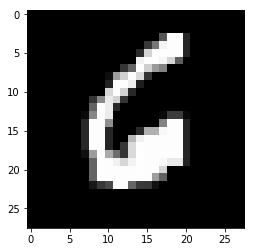

In [4]:
num = np.random.randint(X_train.shape[0])
plt.imshow(X_train[num],cmap='gray')
print("Index: %d, number: %d"%(num, y_train[num]))

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [0]:
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# 1. Plain vanilla model

* Number of parameters: 14,322
* No batch normalization, no dropout

In [8]:
model = Sequential()

model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(16, 3, activation='relu'))

model.add(Convolution2D(8,1,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0811 15:16:39.276058 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 15:16:39.292934 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 15:16:39.296464 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 15:16:39.345243 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 8)         136       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          2320      
__________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

W0811 15:16:44.021756 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 15:16:44.030996 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(X_train, Y_train, batch_size=1000, epochs=40, verbose=1, validation_data=(X_test, Y_test))

W0811 15:16:47.072296 139890028230528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 15:16:47.163091 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 79us/step - loss: 0.9601 - acc: 0.6652 - val_loss: 0.3055 - val_acc: 0.9097
Epoch 2/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.2317 - acc: 0.9299 - val_loss: 0.1638 - val_acc: 0.9507
Epoch 3/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.1415 - acc: 0.9572 - val_loss: 0.1167 - val_acc: 0.9625
Epoch 4/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.0989 - acc: 0.9702 - val_loss: 0.0823 - val_acc: 0.9729
Epoch 5/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.0882 - acc: 0.9739 - val_loss: 0.0736 - val_acc: 0.9758
Epoch 6/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.0739 - acc: 0.9777 - val_loss: 0.0662 - val_acc: 0.9785
Epoch 7/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.0655 - acc: 0.9802 - val_loss: 0.0588 - val_acc

# Results:
## After 40 epochs:
* validation accuracy peaked to 98.9%
* training accuracy hovered around 99.4%

## After 80 epochs:
* validation accuracy remained at ~99%
* training accuracy peaked to 99.7%

This is a clear case of overfitting. This can be avoided by using dropout.

---------

# 2. Model with BatchNormalization and Dropout
This is done to avoid the case of overfitting as seen above.

In [11]:
model = Sequential()

model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8,1,activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0811 15:18:32.193546 139890028230528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0811 15:18:32.261250 139890028230528 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 16)        2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=1000, epochs=40, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 85us/step - loss: 1.0717 - acc: 0.6879 - val_loss: 0.3489 - val_acc: 0.8850
Epoch 2/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.2815 - acc: 0.9305 - val_loss: 0.1109 - val_acc: 0.9670
Epoch 3/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.1504 - acc: 0.9612 - val_loss: 0.0674 - val_acc: 0.9786
Epoch 4/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.1070 - acc: 0.9708 - val_loss: 0.0581 - val_acc: 0.9806
Epoch 5/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.0813 - acc: 0.9775 - val_loss: 0.0401 - val_acc: 0.9871
Epoch 6/40
60000/60000 [==============================] - 3s 53us/step - loss: 0.0708 - acc: 0.9803 - val_loss: 0.0352 - val_acc: 0.9885
Epoch 7/40
60000/60000 [==============================] - 3s 53us/step - loss: 0.0637 - acc: 0.9816 - val_loss: 0.0329 - val_acc

# Results
## After 40 epochs:
* Training accuracy peaks to 99.25%
* Validation accuracy touched 99.4%

Note: We have already hit the target of 99.4% validation accuracy.

Training accuracy isn't increasing much and validation accuracy is exceeding it. This suggests that there might be underfitting. Trying to reduce the number of dropout layers

----------
# 3. Model with lesser dropouts

In [21]:
model = Sequential()

model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8,1,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_33 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_33 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_35 (Batc (None, 22, 22, 16)        64        
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=10000, epochs=40, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 118us/step - loss: 0.0320 - acc: 0.9902 - val_loss: 0.0269 - val_acc: 0.9928
Epoch 2/40
60000/60000 [==============================] - 3s 45us/step - loss: 0.0302 - acc: 0.9909 - val_loss: 0.0269 - val_acc: 0.9920
Epoch 3/40
60000/60000 [==============================] - 3s 45us/step - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0258 - val_acc: 0.9928
Epoch 4/40
60000/60000 [==============================] - 3s 45us/step - loss: 0.0268 - acc: 0.9919 - val_loss: 0.0244 - val_acc: 0.9928
Epoch 5/40
60000/60000 [==============================] - 3s 45us/step - loss: 0.0256 - acc: 0.9922 - val_loss: 0.0236 - val_acc: 0.9931
Epoch 6/40
60000/60000 [==============================] - 3s 45us/step - loss: 0.0262 - acc: 0.9920 - val_loss: 0.0231 - val_acc: 0.9932
Epoch 7/40
60000/60000 [==============================] - 3s 45us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0228 - val_ac

# Results
* Both training and validation accuracies hover between 99.3-99.4% suggesting appropriate regularization. So no need to add more dropout or remove existing dropout layers.
* It is possible that training accuracies are not improving further because of a higher learning rate. This higher learning rate is inhibiting the process of finding the minima of the loss function.

# 4. Varying LR


In [37]:
model = Sequential()

model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8,1,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_65 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_66 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_57 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_67 (Batc (None, 22, 22, 16)        64        
__________

In [0]:
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.3 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, batch_size=1000, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
60000/60000 [==============================] - 10s 168us/step - loss: 0.5033 - acc: 0.8599 - val_loss: 0.1506 - val_acc: 0.9539
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0076923077.
60000/60000 [==============================] - 3s 49us/step - loss: 0.0836 - acc: 0.9756 - val_loss: 0.0623 - val_acc: 0.9793
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.00625.
60000/60000 [==============================] - 3s 49us/step - loss: 0.0615 - acc: 0.9817 - val_loss: 0.0351 - val_acc: 0.9891
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0052631579.
60000/60000 [==============================] - 3s 49us/step - loss: 0.0521 - acc: 0.9844 - val_loss: 0.0365 - val_acc: 0.9881
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0045454545.
60000/60000 [==============

# Results
## Validation accuracy: 99.42%
Trained for 40 epochs and achieved a validation accuracy of 99.42%.  Total 14,802 parameters used.